Libraries Import

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Data import

In [2]:
# load data
data=pd.read_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/train.csv')

Observations des datas

In [3]:
# check the data
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


 Observation des manquants

In [4]:
# Missing values
def compte_na(x):
    # Calculer le nombre de valeurs manquantes par colonne
    missing_counts = x.isna().sum()
    # Calculer le pourcentage de valeurs manquantes par colonne
    percent_missing = (x.isna().sum() / x.shape[0]) * 100
    # Créer un DataFrame contenant les informations sur les colonnes avec des valeurs manquantes
    columns_with_missing_values = pd.DataFrame({
        'Nom': missing_counts.index,
        'Nbr manquants': missing_counts.values,
        'Pourcent manquants': percent_missing.values
    })
    # Filtrer les colonnes avec des valeurs manquantes
    columns_with_missing_values = columns_with_missing_values[columns_with_missing_values['Nbr manquants'] > 0]
    # Ordonner par ordre décroissant
    columns_with_missing_values=columns_with_missing_values.sort_values(by='Pourcent manquants', ascending=False)
    return columns_with_missing_values

<Axes: >

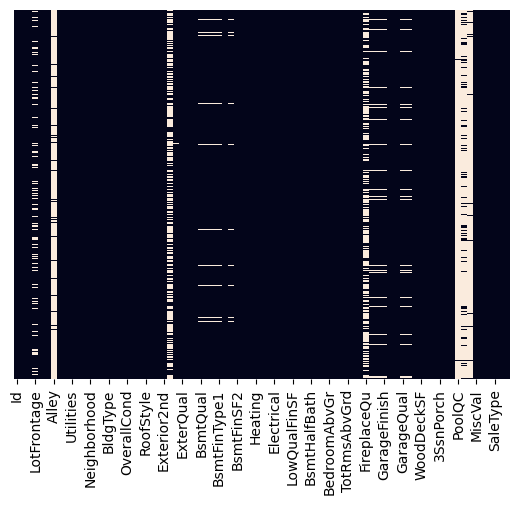

In [5]:
# heatmap of missing values
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

In [6]:
# checking missing values
compte_na(data)

,Nom,Nbr manquants,Pourcent manquants
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
25,MasVnrType,872,59.726027
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945


On voit que certaines variables ont trop de valeurs manquantes. Ainsi, on va supprimer celle ayant plus de 40% de manquants.

In [7]:
# drop columns with too many missing values
var_supprimer=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
data_drop=data.drop(columns=var_supprimer)
compte_na(data_drop)

,Nom,Nbr manquants,Pourcent manquants
3,LotFrontage,259,17.739726
55,GarageType,81,5.547945
56,GarageYrBlt,81,5.547945
57,GarageFinish,81,5.547945
60,GarageQual,81,5.547945
61,GarageCond,81,5.547945
30,BsmtExposure,38,2.602740
33,BsmtFinType2,38,2.602740
28,BsmtQual,37,2.534247
29,BsmtCond,37,2.534247


In [43]:
# check the data type
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

A présent on va passer au data featuring, on va s'occuper dnas un premier temps des variables numériques suivi des variables catégorielles.

In [9]:
# Change data type
data_drop['MSSubClass'] = data_drop['MSSubClass'].astype('object')
data_drop

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
# Variable catégoriel
numeric_data = data_drop.select_dtypes(include=['int64','float64'])
# Variable numérique
categorical_data = data_drop.select_dtypes(include=['object'])
categorical_data = categorical_data.join(data_drop['SalePrice'])


In [11]:
# data dimension
print(numeric_data.shape)
print(categorical_data.shape)

(1460, 37)
(1460, 39)


In [12]:
# check the data
numeric_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Skewness de SalePrice : 1.8828757597682129
Kurtosis de SalePrice : 6.536281860064529


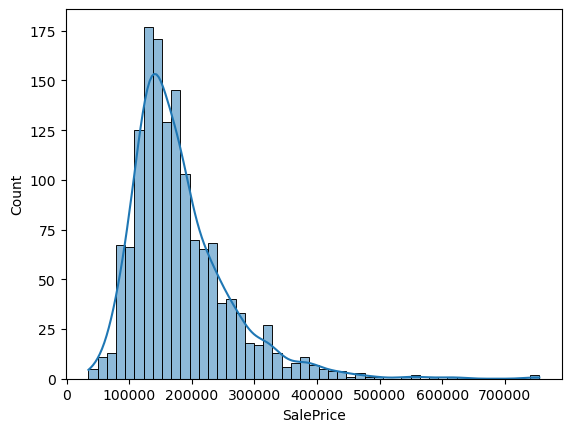

In [13]:
# Data visualization  and statistical test
sns.histplot(data=numeric_data,x='SalePrice',kde='True')
# Calcul de la skewness et de la kurtosis de la variable 'SalePrice'
saleprice_skewness = numeric_data['SalePrice'].skew()
saleprice_kurtosis = numeric_data['SalePrice'].kurtosis()

print("Skewness de SalePrice :", saleprice_skewness)
print("Kurtosis de SalePrice :", saleprice_kurtosis)

On voit que le Skweness indique que la distribution n'est pas noramle et présent une queue vers les valeurs la droite.
Le kurotosis nous indique que la distribution est pllus concentré que la distribution normale (valeur plus concentré).
Ainsi on n'a pour notre variable d'intérêt une distribution plus concentré et présentant une queue vers les valeurs extrêmes.
Il faudra la transformer avant l'application de certains modèles de ML.

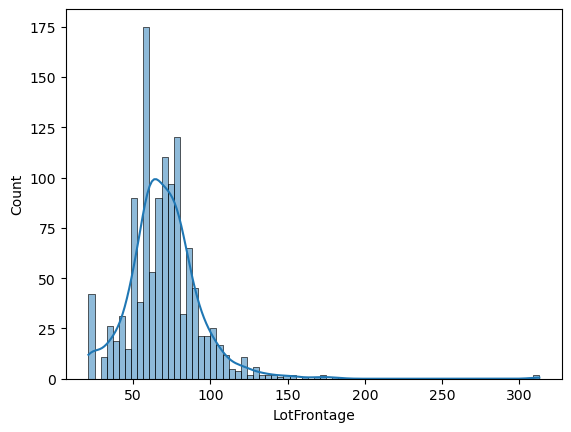

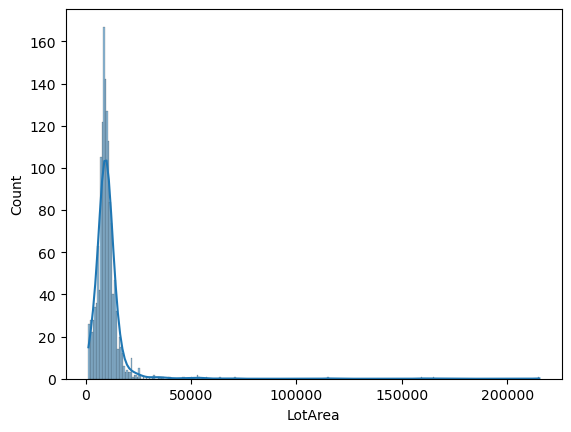

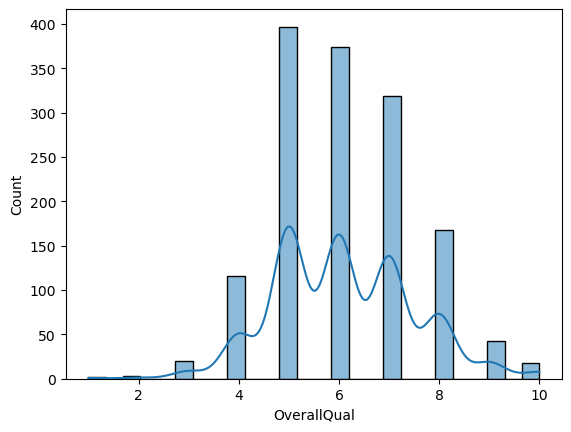

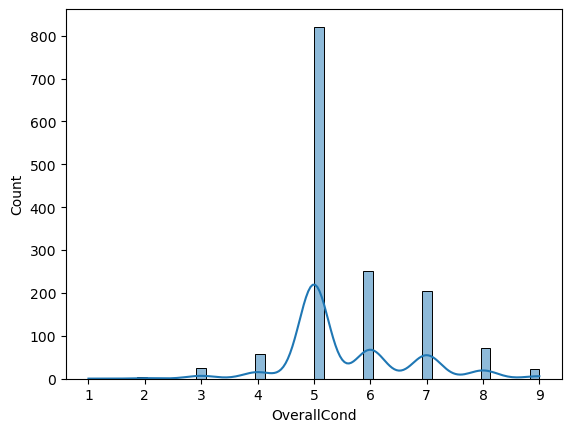

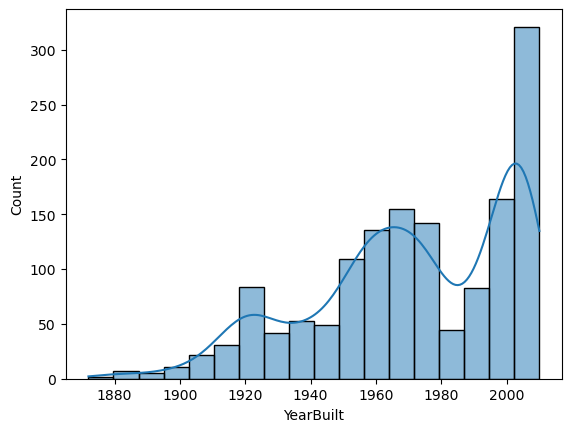

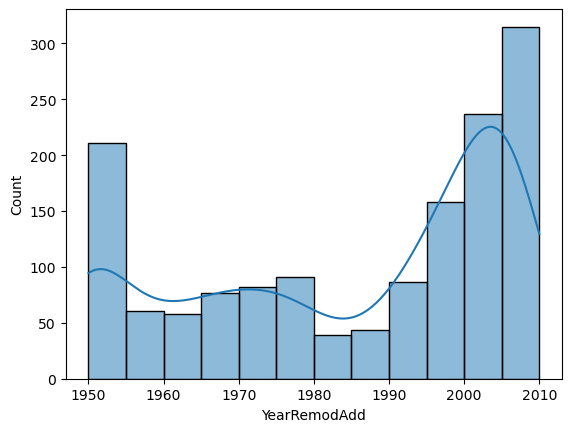

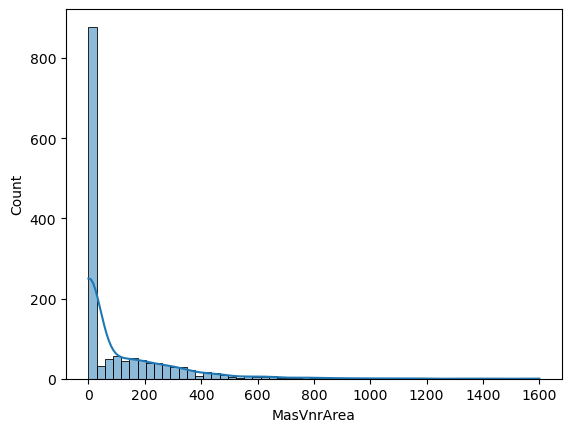

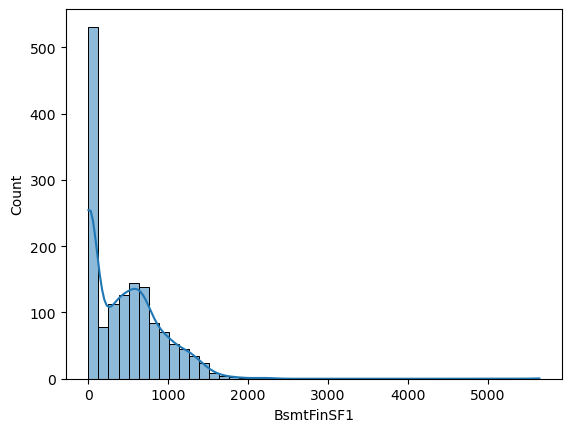

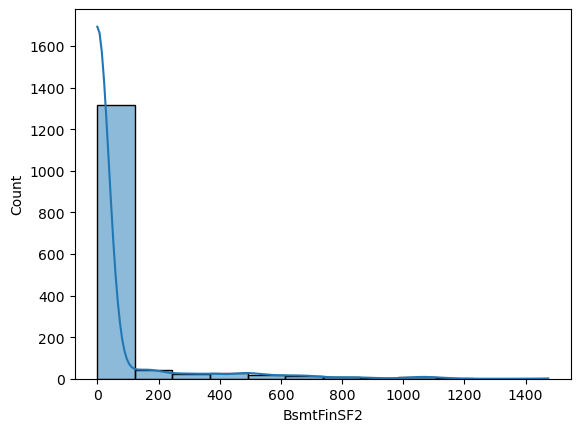

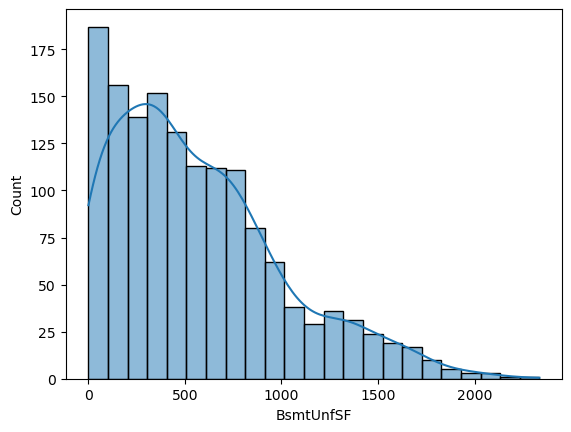

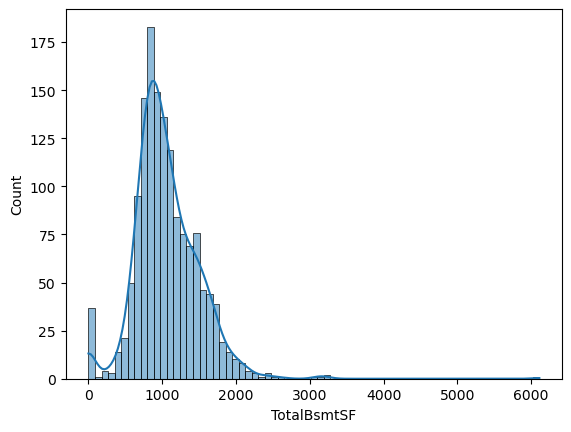

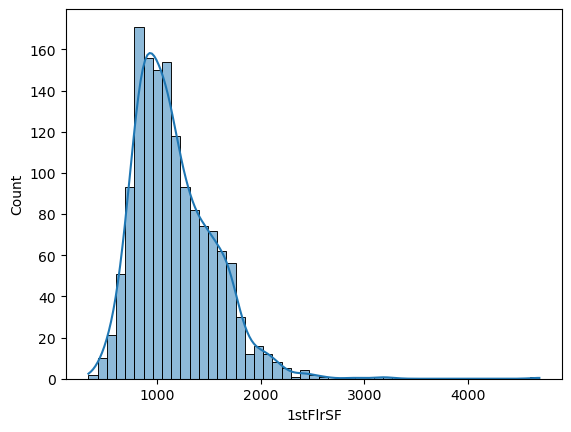

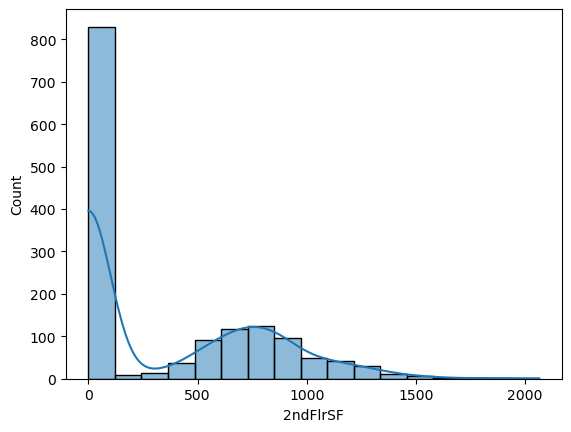

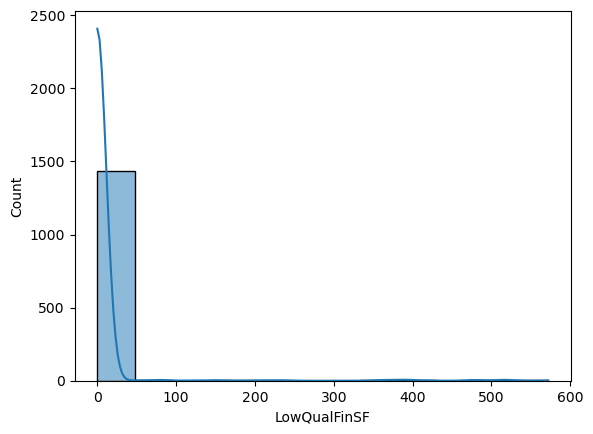

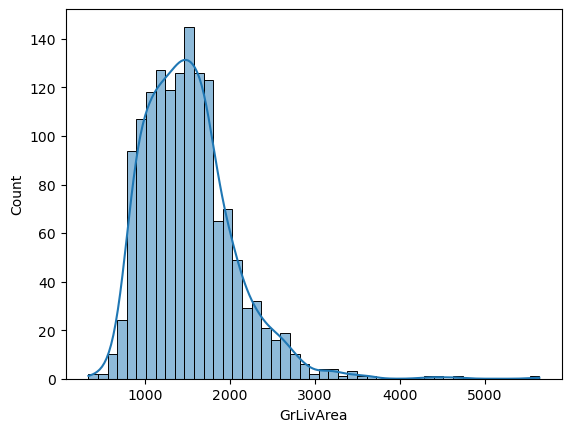

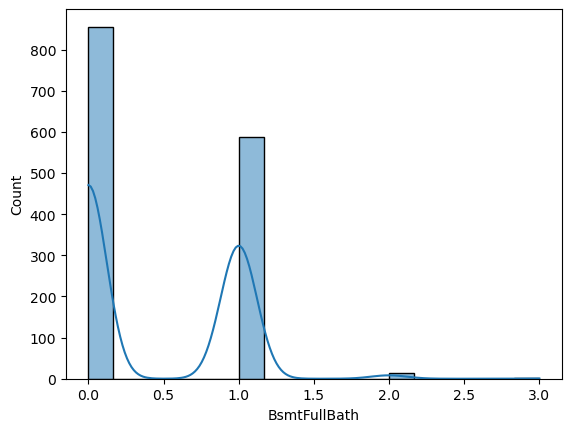

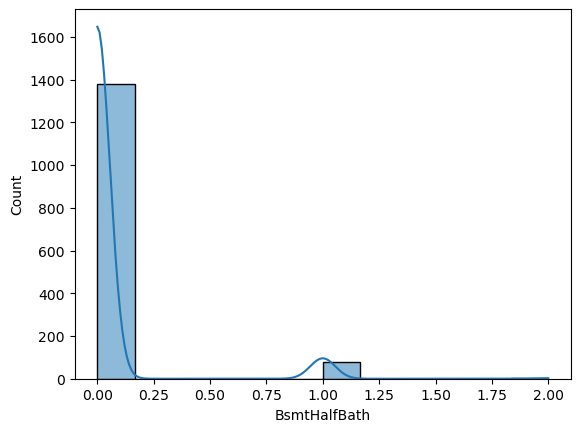

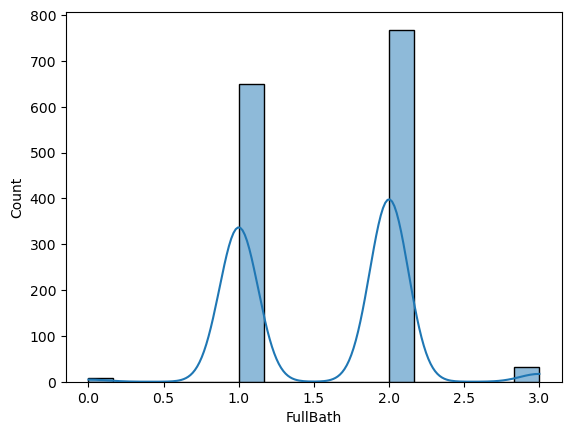

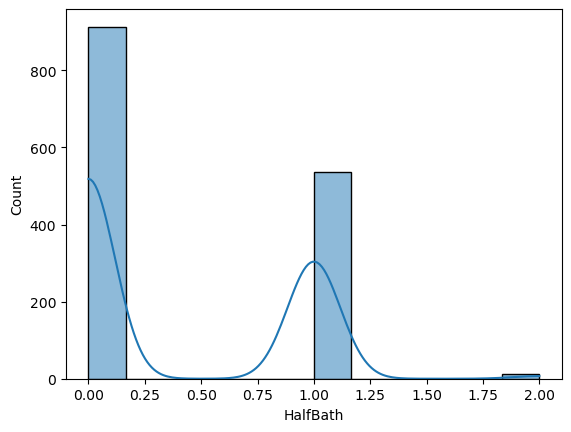

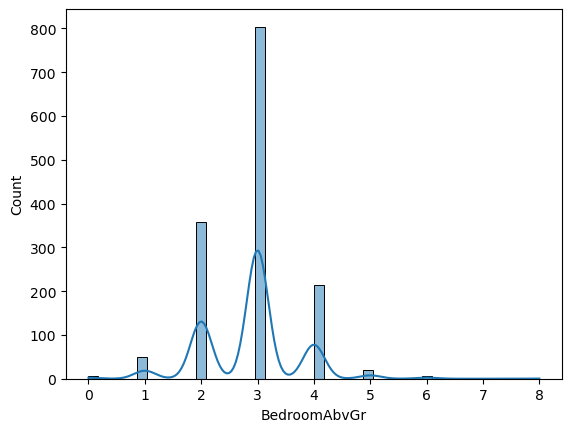

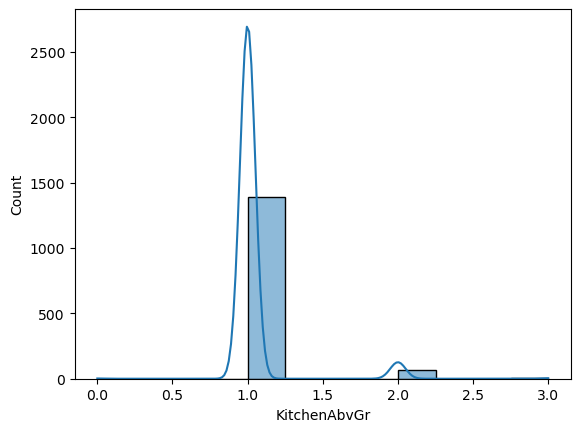

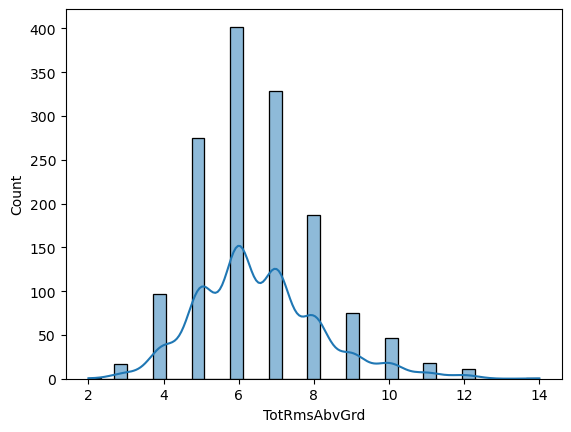

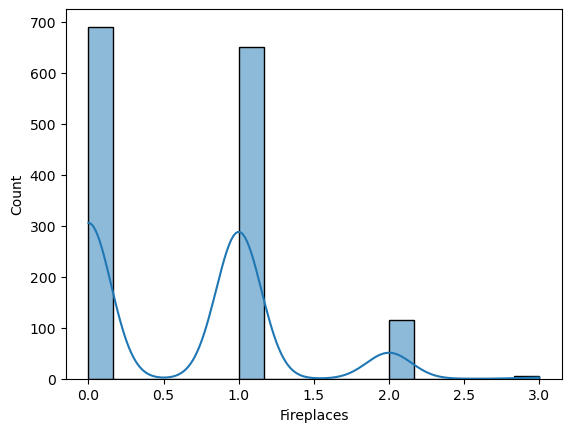

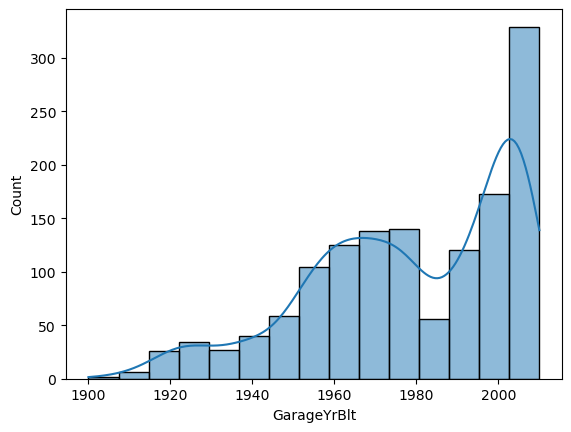

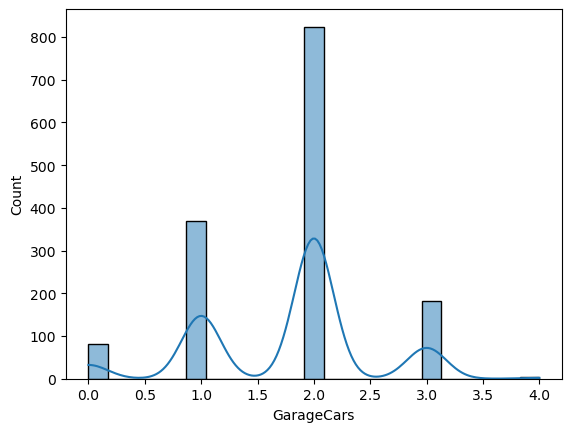

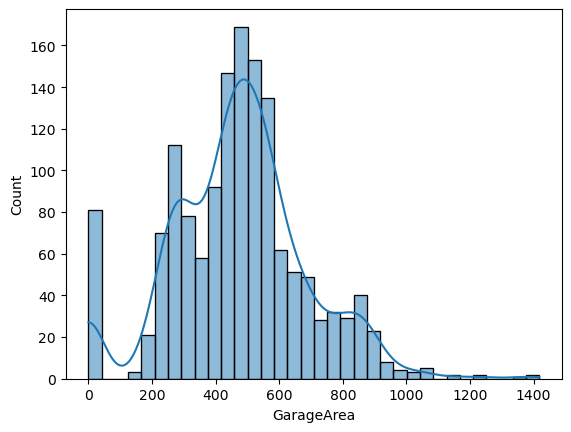

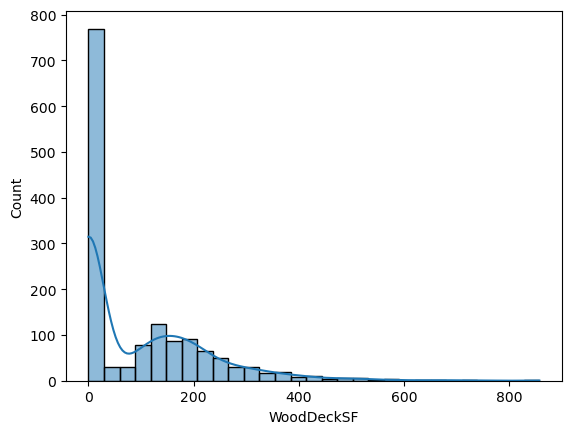

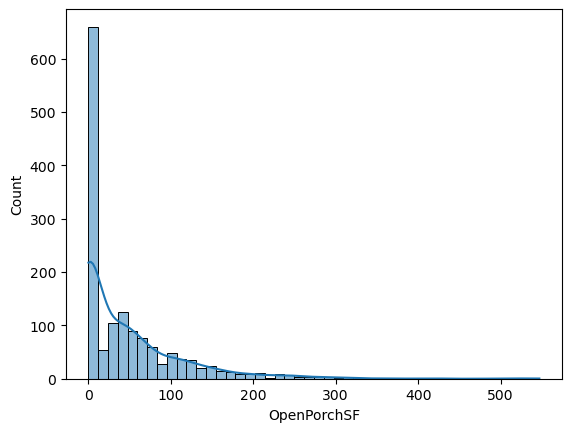

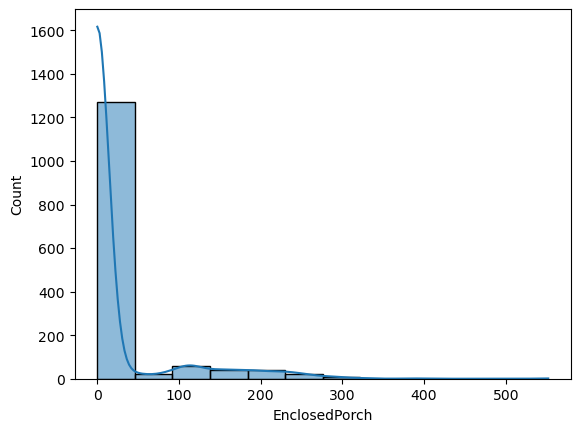

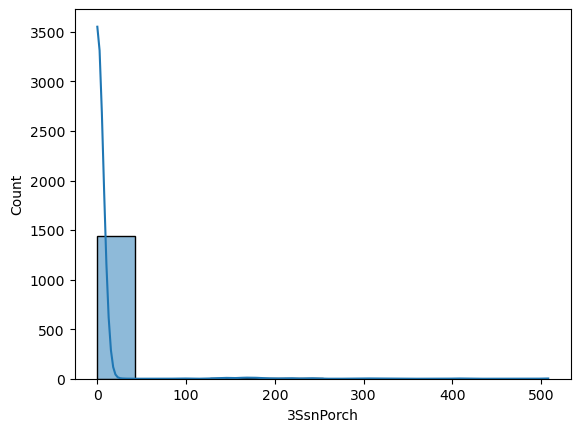

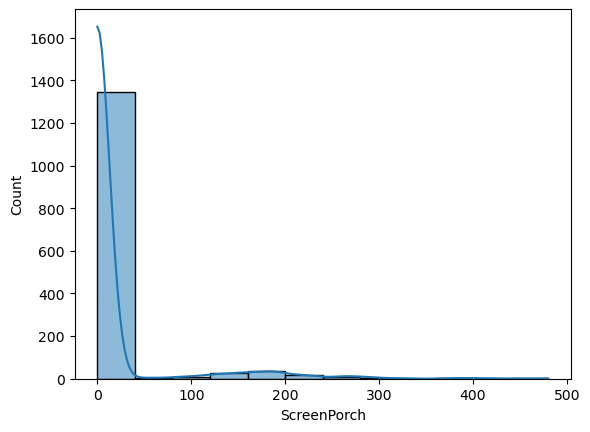

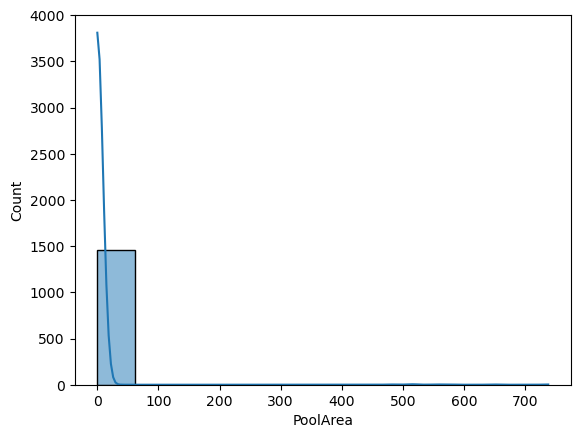

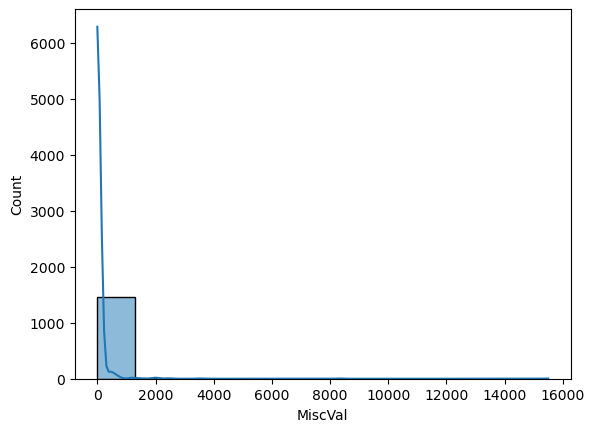

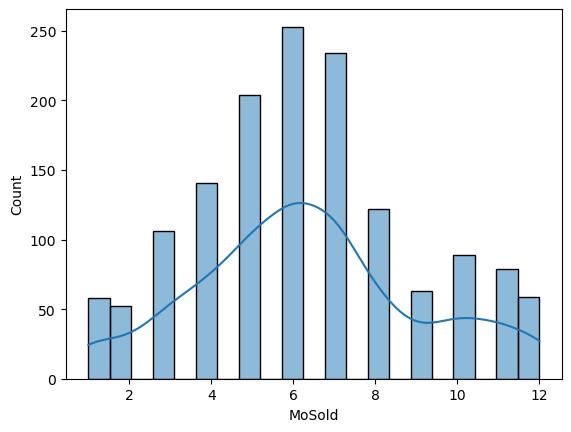

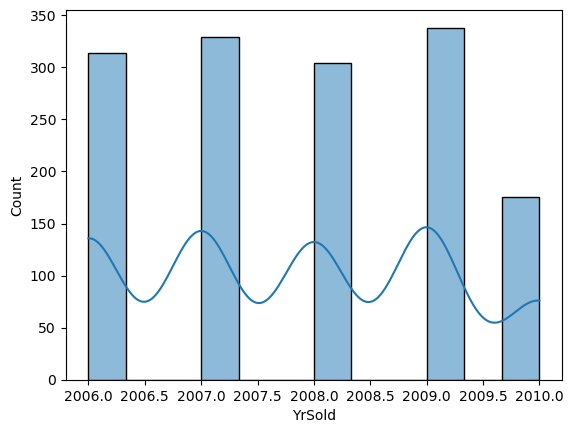

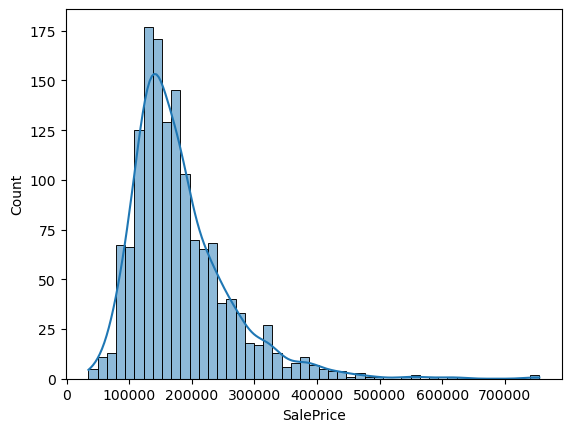

In [14]:
# data visualization for numeric variable
numeric_data_copy = numeric_data.drop(columns='Id')
stockage = []
for var in numeric_data_copy.columns:
    # Créer le graphique
    ax = sns.histplot(data=numeric_data_copy, x=var, kde=True)
    # Ajouter l'axe du sous-graphique à la liste
    stockage.append(ax)
    # Afficher le graphique
    plt.show()

# Afficher tous les graphiques à la suite
plt.show()

LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64


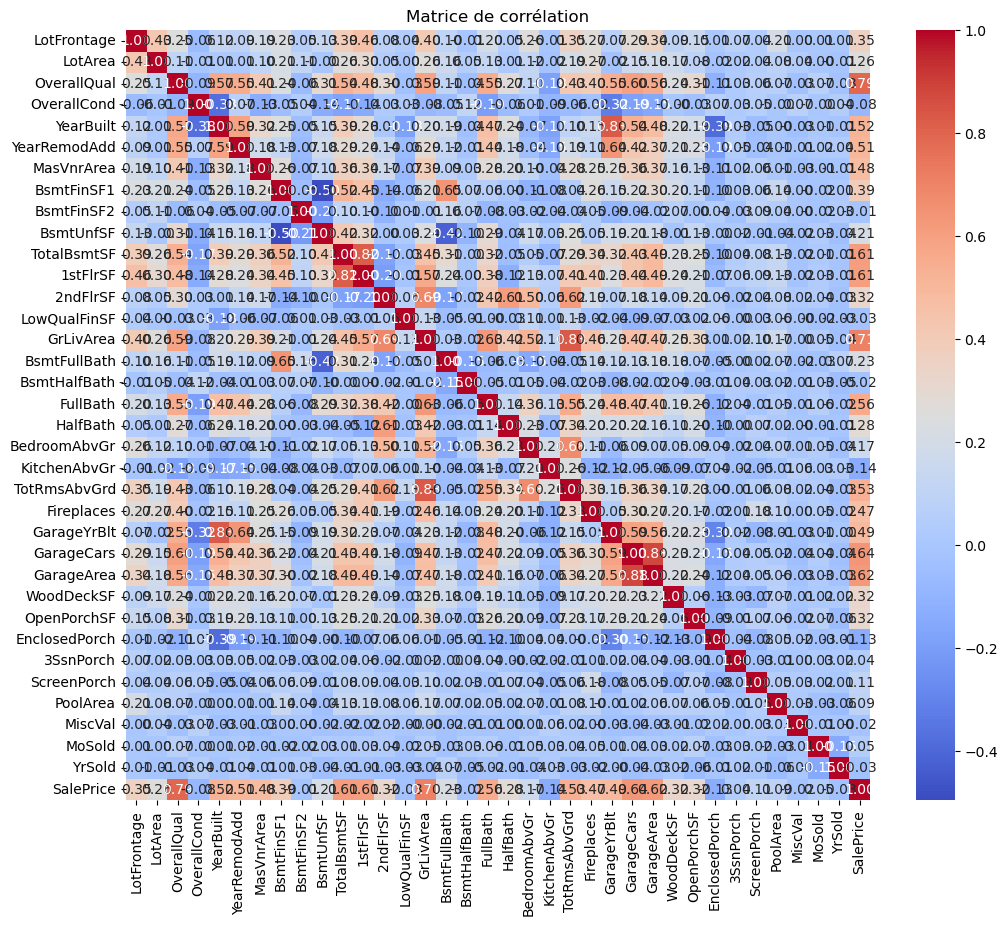

In [15]:
# Correlation matrix
# Calcule de la corrélation avec SalePrice
correlation_matrix = numeric_data_copy.corr()

# Afficher la corrélation avec la variable cible 'SalePrice'
correlation_with_saleprice = correlation_matrix['SalePrice']

print(correlation_with_saleprice)

# Tracer le heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [16]:
# variable selection
# Variable continue retenu
var_continue_retenu=correlation_with_saleprice[abs(correlation_with_saleprice) >= 0.40]
var_continue_retenu

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [17]:
# statistical test for categorical variable
from scipy.stats import spearmanr
test=categorical_data.dropna()
# Calculer le coefficient de corrélation de rang de Spearman entre chaque variable catégorielle et SalePrice
for column in test.columns:
    if column != 'SalePrice':  # Ne pas tester SalePrice contre elle-même
        correlation, p_value = spearmanr(test[column], test['SalePrice'])
        print(f"Variable : {column}, Coefficient de corrélation de rang de Spearman : {correlation}, p-value : {p_value}")


Variable : MSSubClass, Coefficient de corrélation de rang de Spearman : 0.01649939841018934, p-value : 0.5453075074369609
Variable : MSZoning, Coefficient de corrélation de rang de Spearman : -0.3384814075789029, p-value : 1.965265762276741e-37
Variable : Street, Coefficient de corrélation de rang de Spearman : 0.04232109830146939, p-value : 0.12068045082739692
Variable : LotShape, Coefficient de corrélation de rang de Spearman : -0.30187753676397394, p-value : 9.286275929095693e-30
Variable : LandContour, Coefficient de corrélation de rang de Spearman : -0.02950584859499115, p-value : 0.2793695854667249
Variable : Utilities, Coefficient de corrélation de rang de Spearman : -0.021614218501295038, p-value : 0.42816506766562046
Variable : LotConfig, Coefficient de corrélation de rang de Spearman : -0.06919450353254017, p-value : 0.01110794611372845
Variable : LandSlope, Coefficient de corrélation de rang de Spearman : 0.06021376506684734, p-value : 0.02716997335243921
Variable : Neighbor

In [18]:
# statistical test for categorical variable
from scipy.stats import spearmanr

# Créer une liste pour stocker les noms des variables avec un coefficient de corrélation >= 0.4
selected_variables = []

# Calculer le coefficient de corrélation de rang de Spearman entre chaque variable catégorielle et SalePrice
for column in test.columns:
    if column != 'SalePrice':  # Ne pas tester SalePrice contre elle-même
        correlation, p_value = spearmanr(test[column], test['SalePrice'])
        if abs(correlation) >= 0.4:
            selected_variables.append(column)
            print(f"Variable : {column}, Coefficient de corrélation de rang de Spearman : {correlation}, p-value : {p_value}")

Variable : ExterQual, Coefficient de corrélation de rang de Spearman : -0.6477785685715819, p-value : 5.521000280607385e-161
Variable : Foundation, Coefficient de corrélation de rang de Spearman : 0.551132121824922, p-value : 8.616004602653984e-108
Variable : BsmtQual, Coefficient de corrélation de rang de Spearman : -0.5906154163005899, p-value : 2.3437859772526922e-127
Variable : HeatingQC, Coefficient de corrélation de rang de Spearman : -0.4811075317267579, p-value : 6.615033366794222e-79
Variable : KitchenQual, Coefficient de corrélation de rang de Spearman : -0.6036424265911521, p-value : 2.0098158017629345e-134
Variable : GarageType, Coefficient de corrélation de rang de Spearman : -0.4403746089706373, p-value : 5.9576313020371965e-65
Variable : GarageFinish, Coefficient de corrélation de rang de Spearman : -0.5884138539120077, p-value : 3.408600054663315e-126


In [20]:
# variable selected
variable_categoriel=['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']
variable_continue=['OverallQual','YearBuilt','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd',
'Fireplaces','GarageYrBlt','GarageCars','SalePrice']

In [21]:
# create a new data final with selected variable
data_final=data[variable_categoriel+variable_continue]
print(data_final.shape)
data_final.head()

(1460, 19)


,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageType,GarageFinish,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,SalePrice
0,Gd,PConc,Gd,Ex,Gd,Attchd,RFn,7,2003,196.0,856,856,1710,2,8,0,2003.0,2,208500
1,TA,CBlock,Gd,Ex,TA,Attchd,RFn,6,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,181500
2,Gd,PConc,Gd,Ex,Gd,Attchd,RFn,7,2001,162.0,920,920,1786,2,6,1,2001.0,2,223500
3,TA,BrkTil,TA,Gd,Gd,Detchd,Unf,7,1915,0.0,756,961,1717,1,7,1,1998.0,3,140000
4,Gd,PConc,Gd,Ex,Gd,Attchd,RFn,8,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,250000


In [22]:
# Split data into training and validation data
from sklearn.model_selection import train_test_split
# Separate target from predictors
y = data_final.SalePrice
X = data_final.drop(['SalePrice'], axis=1)
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)

In [23]:
# Pipeline creation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
variable_continue=['OverallQual','YearBuilt','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd',
'Fireplaces','GarageYrBlt','GarageCars']
variable_categoriel=['ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, variable_continue),
        ('cat', categorical_transformer, variable_categoriel)
    ])

In [50]:
# Model creation
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0,max_depth=10)
import xgboost
classifier=xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=1)

In [52]:
# Model training
from sklearn.metrics import root_mean_squared_error
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
score = root_mean_squared_error(y_test, preds)
print('RMSE:', score)

RMSE: 29445.804719848154


In [53]:
# Import the test data
data_finale_envoie=pd.read_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/test.csv')
data_copy=data_finale_envoie
data_finale_envoie=data_finale_envoie.drop(['Id'], axis=1)
data_finale_envoie

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [54]:
# model validation on the test data
pred_final=my_pipeline.predict(data_finale_envoie)
pred_final

array([121615.55078943, 134144.19512262, 172632.20791795, ...,
       147804.30147653, 118674.68798092, 213332.47415081])

In [56]:
# Submission
output = pd.DataFrame({'Id': data_copy['Id'],
                       'SalePrice': pred_final})
output
output.to_csv('/Users/abdul/Desktop/machine learning/data/home-data-for-ml-course/soumission_python.csv', index=False)

Fin du projet pas mal dans le top 10 de kaggle